# WeRateDogs twitter data wrangling

#### Devin McCormack

Gathering Data for this Project

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

1. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

1. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

## Gather

### Import manually downloaded WeRateDogs twitter archive from 'twitter-archive-enhanced.csv'

In [1]:
import pandas as pd
import requests
import os

In [2]:
df_dog=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_dog.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### Programatically request for the image predictions from Udacity servers

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

df_breed=pd.read_csv('image-predictions.tsv',sep='\t')

df_breed.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### Use Twiter API to access each tweet's json file and read into a dataframe

In [5]:
import tweepy

accesskey=pd.read_csv('twittertoken.csv')

consumer_key = accesskey.consumer_key[0]
consumer_secret = accesskey.consumer_secret[0]
access_token = accesskey.access_token[0]
access_secret = accesskey.access_secret[0]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# api.get_status(id_of_tweet)
import json
# try:
#     os.remove('tweet_json.txt')
# except:
#     pass
if os.path.isfile('tweet_json.txt'):
    print('file already exists')
else:
    count=0
    for tweet_id in df_dog.tweet_id:
        try:
            tweet=api.get_status(tweet_id,tweet_mode='extended')
            writetweet=tweet._json
            with open('tweet_json.txt',mode='a',encoding='utf-8') as file:
                json.dump(writetweet,file)
                file.write('\n')
            count+=1
            print(count,tweet._json.get('id_str'))
        except:
            with open('tweet_json.txt',mode='a',encoding='utf-8') as file:
                file.write('\n')
            count+=1
            print(count,'TWEET NOT FOUND!')




file already exists


Probe pretty-printed example of JSON, compare with [tweet data dictionary](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object) to find important attributes

In [7]:
with open('tweet_json.txt',mode='r') as file:
    tweet=json.dumps(json.loads(file.readline()),indent=4)
print(tweet)   

{
    "created_at": "Tue Aug 01 16:23:56 +0000 2017",
    "id": 892420643555336193,
    "id_str": "892420643555336193",
    "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
    "truncated": false,
    "display_text_range": [
        0,
        85
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [],
        "urls": [],
        "media": [
            {
                "id": 892420639486877696,
                "id_str": "892420639486877696",
                "indices": [
                    86,
                    109
                ],
                "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "url": "https://t.co/MgUWQ76dJU",
                "display_url": "pic.twitter.com/MgUWQ76dJU",
                "expanded_url": "https://twitter.com/dog_rat

dict keys of important features:

 'id_str','favorite_count', 'retweet_count'
 
Features that might be interesting: 

'followers_count' under user - do we need to normalize favorites/retweets by the number of current followers?



In [8]:
with open('tweet_json.txt',mode='r') as file:
    tweet=json.loads(file.readline())

In [9]:
## twitter suggests grabbing id_str to ensure that full number is grabbed
## there are potential issues with assigned int types
tweet.get('id_str')

'892420643555336193'

In [10]:
tweet.get('favorite_count')

39140

In [11]:
tweet.get('retweet_count')

8704

In [12]:
tweet.get('user').get('followers_count')

5627901

#### Put together loop to create dataframe from twitter JSON txt file

In [13]:
df_list=[]
with open('tweet_json.txt',mode='r') as file:
    content = file.read().splitlines()
    for line in content:
        try:
            tweet=json.loads(line)
            tweet_id=tweet.get('id_str')
            favorite_count=tweet.get('favorite_count')
            retweet_count=tweet.get('retweet_count')
            created_at=tweet.get('created_at')
            followers_count=tweet.get('user').get('followers_count')
            df_list.append({'tweet_id': tweet_id,
                            'favorite_count': favorite_count,
                            'retweet_count': retweet_count,
                            'followers_count': followers_count})
        
        except:
            pass
        
        
        
df_tweet = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count','followers_count'])

df_tweet.head()

tweet_id  favorite_count  retweet_count  followers_count
0  892420643555336193           39140           8704          5627901
1  892177421306343426           33522           6388          5627901
2  891815181378084864           25264           4245          5627901
3  891689557279858688           42487           8801          5627901
4  891327558926688256           40664           9583          5627901

## Assess

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [14]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df_dog[df_dog.expanded_urls.isnull()][['tweet_id','in_reply_to_status_id','retweeted_status_id']]

tweet_id  in_reply_to_status_id  retweeted_status_id
30    886267009285017600           8.862664e+17                  NaN
55    881633300179243008           8.816070e+17                  NaN
64    879674319642796034           8.795538e+17                  NaN
113   870726314365509632           8.707262e+17                  NaN
148   863427515083354112           8.634256e+17                  NaN
179   857214891891077121           8.571567e+17                  NaN
185   856330835276025856                    NaN         8.563302e+17
186   856288084350160898           8.562860e+17                  NaN
188   855862651834028034           8.558616e+17                  NaN
189   855860136149123072           8.558585e+17                  NaN
218   850333567704068097           8.503288e+17                  NaN
228   848213670039564288           8.482121e+17                  NaN
234   847617282490613760           8.476062e+17                  NaN
274   840698636975636481           8.406983e+17                  NaN
290   838150277551247360           8.381455e+17                  NaN
291   838085839343206401           8.380855e+17                  NaN
313   835246439529840640           8.352460e+17                  NaN
342   832088576586297345           8.320875e+17                  NaN
346   831926988323639298           8.319030e+17                  NaN
375   828361771580813312                    NaN                  NaN
387   826598799820865537           8.265984e+17                  NaN
409   823333489516937216           8.233264e+17                  NaN
427   821153421864615936           8.211526e+17                  NaN
498   813130366689148928           8.131273e+17                  NaN
513   811647686436880384           8.116272e+17                  NaN
570   801854953262350336           8.018543e+17                  NaN
576   800859414831898624           8.008580e+17                  NaN
611   797165961484890113           7.971238e+17                  NaN
701   786051337297522688           7.727430e+17                  NaN
707   785515384317313025                    NaN                  NaN
843   766714921925144576           7.667118e+17                  NaN
857   763956972077010945           7.638652e+17                  NaN
967   750381685133418496           7.501805e+17                  NaN
1005  747651430853525504           7.476487e+17                  NaN
1080  738891149612572673           7.384119e+17                  NaN
1295  707983188426153984           7.079801e+17                  NaN
1345  704491224099647488           7.044857e+17                  NaN
1445  696518437233913856                    NaN                  NaN
1446  696490539101908992           6.964887e+17                  NaN
1474  693644216740769793           6.936422e+17                  NaN
1479  693582294167244802           6.935722e+17                  NaN
1497  692423280028966913           6.924173e+17                  NaN
1523  690607260360429569           6.903413e+17                  NaN
1598  686035780142297088           6.860340e+17                  NaN
1605  685681090388975616           6.855479e+17                  NaN
1618  684969860808454144           6.849598e+17                  NaN
1663  682808988178739200           6.827884e+17                  NaN
1689  681340665377193984           6.813394e+17                  NaN
1774  678023323247357953           6.780211e+17                  NaN
1819  676590572941893632           6.765883e+17                  NaN
1844  675849018447167488           6.758457e+17                  NaN
1895  674742531037511680           6.747400e+17                  NaN
1905  674606911342424069           6.744689e+17                  NaN
1914  674330906434379776           6.658147e+17                  NaN
1940  673716320723169284           6.737159e+17                  NaN
2038  671550332464455680           6.715449e+17                  NaN
2149  669684865554620416           6.693544e+17                  NaN
2189  66896787

In [16]:
df_dog.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [17]:
df_dog.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
df_dog.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
df_dog[df_dog.rating_numerator==2]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1761  678675843183484930                    NaN                  NaN   
1764  678424312106393600                    NaN                  NaN   
1920  674265582246694913                    NaN                  NaN   
2079  670826280409919488                    NaN                  NaN   
2237  668142349051129856                    NaN                  NaN   
2246  667878741721415682                    NaN                  NaN   
2310  666786068205871104                    NaN                  NaN   
2326  666411507551481857                    NaN                  NaN   
2349  666051853826850816                    NaN                  NaN   

                      timestamp  \
1761  2015-12-20 20:38:24 +0000   
1764  2015-12-20 03:58:55 +0000   
1920  2015-12-08 16:33:36 +0000   
2079  2015-11-29 04:47:03 +0000   
2237  2015-11-21 19:02:04 +0000   
2246  2015-11-21 01:34:35 +0000   
2310  2015-11-18 01:12:41 +0000   
2326  2015-11-17 00:24:19 +0000   
2349  2015-11-16 00:35:11 +0000   

                                                 source  \
1761  <a href="http://twitter.com/download/iphone" r...   
1764  <a href="http://twitter.com/download/iphone" r...   
1920  <a href="http://twitter.com/download/iphone" r...   
2079  <a href="http://twitter.com/download/iphone" r...   
2237  <a href="http://twitter.com/download/iphone" r...   
2246  <a href="http://twitter.com/download/iphone" r...   
2310  <a href="http://twitter.com/download/iphone" r...   
2326  <a href="http://twitter.com/download/iphone" r...   
2349  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1761  Exotic pup here. Tail long af. Throat looks sw...                  NaN   
1764  This is Crystal. She's a shitty fireman. No se...                  NaN   
1920  This is Henry. He's a shit dog. Short pointy e...                  NaN   
2079  Scary dog here. Too many legs. Extra tail. Not...                  NaN   
2237  This lil pup is Oliver. Hops around. Has wings...                  NaN   
2246  This is Tedrick. He lives on the edge. Needs s...                  NaN   
2310  Unfamiliar with this breed. Ears pointy af. Wo...                  NaN   
2326  This is quite the dog. Gets really excited whe...                  NaN   
2349  This is an odd dog. Hard on the outside but lo...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1761                       NaN                        NaN   
1764                       NaN                        NaN   
1920                       NaN                        NaN   
2079                       NaN                        NaN   
2237                       NaN                        NaN   
2246                       NaN                        NaN   
2310                       NaN                        NaN   
2326                       NaN                        NaN   
2349                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1761  https://twitter.com/dog_rates/status/678675843...                 2   
1764  https://twitter.com/dog_rates/status/678424312...                 2   
1920  https://twitter.com/dog_rates/status/674265582...                 2   
2079  https://twitter.com/dog_rates/status/670826280...                 2   
2237  https://twitter.com/dog_rates/status/668142349...                 2   
2246  https://twitter.com/dog_rates/status/667878741...                 2   
2310  https://twitter.com/dog_rates/status/666786068...                 2   
2326  https://twitter.com/dog_rates/status/666411507...                 2   
2349  https://twitter.com/dog_rates/status/666051853...                 2   

      rating_denominator     name doggo floofer pupper puppo  
1761                  10     None  None    None   None  None  
1764                  10  Crystal  None    N

In [20]:
df_dog[df_dog.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [21]:
df_dog.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
df_dog[df_dog.source=='<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
529   808344865868283904                    NaN                  NaN   
562   802600418706604034                    NaN                  NaN   
657   791774931465953280                    NaN                  NaN   
672   789903600034189313                    NaN                  NaN   
699   786286427768250368                    NaN                  NaN   
713   784183165795655680                    NaN                  NaN   
714   784057939640352768                    NaN                  NaN   
731   781655249211752448                    NaN                  NaN   
733   781308096455073793                    NaN                  NaN   
746   780074436359819264                    NaN                  NaN   
783   775350846108426240                    NaN                  NaN   
881   760521673607086080                    NaN                  NaN   
886   759943073749200896                    NaN                  NaN   
905   758099635764359168                    NaN                  NaN   
939   753039830821511168                    NaN                  NaN   
941   752932432744185856                    NaN                  NaN   
946   752568224206688256                    NaN                  NaN   
951   751950017322246144                    NaN                  NaN   
954   751793661361422336                    NaN                  NaN   
985   749075273010798592                    NaN                  NaN   
996   748337862848962560                    NaN                  NaN   
999   748220828303695873                    NaN                  NaN   
1006  747648653817413632                    NaN                  NaN   
1011  747439450712596480                    NaN                  NaN   
1020  746757706116112384                    NaN                  NaN   
1022  746542875601690625                    NaN                  NaN   
1033  745074613265149952                    NaN                  NaN   
1051  742534281772302336                    NaN                  NaN   
1062  741099773336379392                    NaN                  NaN   
1075  739623569819336705                    NaN                  NaN   
...                  ...                    ...                  ...   
1482  693267061318012928                    NaN                  NaN   
1502  692041934689402880                    NaN                  NaN   
1505  691793053716221953                    NaN                  NaN   
1515  690989312272396288                    NaN                  NaN   
1528  690348396616552449                    NaN                  NaN   
1534  689993469801164801                    NaN                  NaN   
1549  689255633275777024                    NaN                  NaN   
1566  687841446767013888                    NaN                  NaN   
1570  687732144991551489                    NaN                  NaN   
1577  687399393394311168                    NaN                  NaN   
1586  686760001961103360                    NaN                  NaN   
1592  686394059078897668                    NaN                  NaN   
1596  686286779679375361                    NaN                  NaN   
1625  684830982659280897                    NaN                  NaN   
1628  684588130326986752                    NaN                  NaN   
1640  684147889187209216                    NaN                  NaN   
1650  683515932363329536                    NaN                  NaN   
1676  682088079302213632                    NaN                  NaN   
1706  680805554198020098                    NaN                  NaN   
1728  679872969355714560                    NaN                  NaN   
1743  679405845277462528                    NaN                  NaN   
1750  679001094530465792                    NaN                  NaN   
1760  678708137298427904                    NaN                  NaN   
1776  677961670166224897                    NaN         

In [23]:
df_dog.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Penny            10
Tucker           10
Lola             10
Winston           9
Bo                9
Sadie             8
the               8
Toby              7
Bailey            7
an                7
Daisy             7
Buddy             7
Rusty             6
Stanley           6
Bella             6
Milo              6
Scout             6
Oscar             6
Dave              6
Leo               6
Koda              6
Jack              6
Jax               6
very              5
               ... 
Rizzo             1
Stuart            1
Maxwell           1
Pumpkin           1
Heinrich          1
Winifred          1
Pippin            1
Gin               1
Shnuggles         1
Brandi            1
Clarq             1
Crumpet           1
Iggy              1
Dotsy             1
Stormy            1
Bluebert          1
Dietrich          1
Tessa             1
Brockly           1


In [24]:
df_dog.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [25]:
df_dog[df_dog.doggo!='None']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
9     890240255349198849                    NaN                  NaN   
43    884162670584377345                    NaN                  NaN   
99    872967104147763200                    NaN                  NaN   
108   871515927908634625                    NaN                  NaN   
110   871102520638267392                    NaN                  NaN   
121   869596645499047938                    NaN                  NaN   
172   858843525470990336                    NaN                  NaN   
191   855851453814013952                    NaN                  NaN   
200   854010172552949760                    NaN                  NaN   
211   851953902622658560                    NaN                  NaN   
240   846514051647705089                    NaN                  NaN   
248   845397057150107648                    NaN                  NaN   
300   836753516572119041                    NaN                  NaN   
318   834574053763584002                    NaN                  NaN   
323   834089966724603904                    NaN                  NaN   
331   832998151111966721                    NaN                  NaN   
339   832273440279240704                    NaN                  NaN   
344   832032802820481025                    NaN                  NaN   
345   831939777352105988                    NaN                  NaN   
351   831322785565769729                    NaN                  NaN   
359   829878982036299777                    NaN                  NaN   
362   829449946868879360                    NaN                  NaN   
363   829374341691346946                    NaN                  NaN   
372   828381636999917570                    NaN                  NaN   
384   826958653328592898                    NaN                  NaN   
385   826848821049180160                    NaN                  NaN   
389   826476773533745153                    NaN                  NaN   
391   826204788643753985                    NaN                  NaN   
423   821765923262631936                    NaN                  NaN   
425   821421320206483457                    NaN                  NaN   
...                  ...                    ...                  ...   
857   763956972077010945           7.638652e+17         1.584641e+07   
877   760893934457552897                    NaN                  NaN   
881   760521673607086080                    NaN                  NaN   
889   759793422261743616                    NaN                  NaN   
899   758828659922702336                    NaN                  NaN   
914   757393109802180609                    NaN                  NaN   
919   756526248105566208                    NaN                  NaN   
924   755206590534418437                    NaN                  NaN   
944   752682090207055872                    NaN                  NaN   
945   752660715232722944                    NaN                  NaN   
948   752334515931054080                    NaN                  NaN   
956   751583847268179968                    NaN                  NaN   
967   750381685133418496           7.501805e+17         4.717297e+09   
977   750011400160841729                    NaN                  NaN   
985   749075273010798592                    NaN                  NaN   
989   748932637671223296                    NaN                  NaN   
992   748692773788876800                    NaN                  NaN   
1030  745433870967832576                    NaN                  NaN   
1039  744234799360020481                    NaN                  NaN   
1051  742534281772302336                    NaN                  NaN   
1063  741067306818797568                    NaN                  NaN   
1075  739623569819336705                    NaN                  NaN   
1079  739238157791694849                    NaN                  NaN   
1103  735256018284875776                    NaN         

In [26]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 4 columns):
tweet_id           2347 non-null object
favorite_count     2347 non-null int64
retweet_count      2347 non-null int64
followers_count    2347 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.4+ KB


In [27]:
df_tweet.describe()

favorite_count  retweet_count  followers_count
count     2347.000000    2347.000000     2.347000e+03
mean      8118.085215    3065.134214     5.628142e+06
std      12204.073905    5090.205399     1.999712e+02
min          0.000000       0.000000     5.627901e+06
25%       1408.500000     611.500000     5.627924e+06
50%       3568.000000    1433.000000     5.628174e+06
75%      10054.000000    3576.000000     5.628198e+06
max     144100.000000   78219.000000     5.628722e+06

In [28]:
df_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_breed.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [30]:
df_breed

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

Some images are not categorized as dogs, with high confidence. Maybe these aren't dogs at all?

In [31]:
url=df_breed.jpg_url[df_breed.tweet_id==666051853826850816].iloc[0]

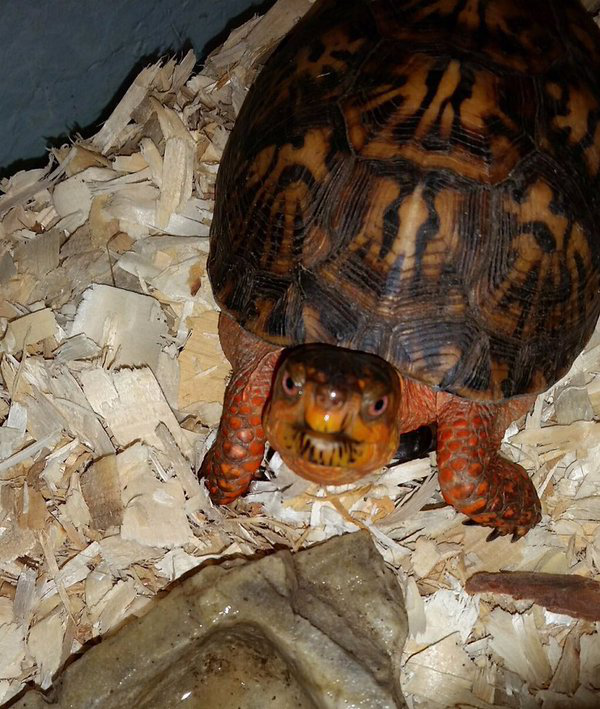

In [32]:
from PIL import Image
from io import BytesIO
r=requests.get(url)
i = Image.open(BytesIO(r.content))
i

In [33]:
list(df_dog.text[df_dog.tweet_id==666051853826850816])

["This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc"]

This one is clearly not a dog (the NN did not make a classification mistake). Additionally, this type of image can explain some of the really low ratings for some images.

*** 

## `df_dog` Quality issues:


- datatypes: timestamp is object not datetime, tweet_id should be string
- there are 181 retweets
- some tweets have non-10 denominators. They may not have been programmatically extracted correctly
- some tweets have oddly low ratings numerators. They may not have been programmatically extracted correctly. Also some tweets have decimal numerators that is not reflected in the extraction.
- name is extracted programmatically as the word following "this is" or "here is", sometimes this word is not a name, e.g. "a", "an", "the".
- name is coded so that "None" is a valid name
- some images can have multiple dog stages (multiple dogs?)
- after removing retweets and replies, the in_reply_to... and retweet... columns can be removed
- source, which describes how the tweet was posted, seems to be generally uninformative. The only potentially interesting contrast is if it was posted on vine, but this is indicated in the expanded url.

## `df_tweet` Quality issues:
- there are 2356 tweets in `df_dog` but only 2347 in `df_tweets`. Some tweets were deleted


## `df_breed` Quality issues:
- tweet_id datatype should be string.
- Some images are not classified as dogs (either because they are not dogs or misclassification)
- there are 2356 tweets in `df_dog` but only 2075 classified dogs in `df_breed`.


## Tidyness issues:

- the three sources can be joined into 1 table, as all values are measured on the same unit, tweet_id.

- dog "stages" can be combined together into one category.
- the classification format in the breed data is technically untidy, but it may not need to be fixed in this case. 
- `rating_numerator` and `rating_denominator` can be combined into a single rating value.

*** 


## Clean

#### Define

- dog "stages" can be combined together into one category.

create one column with output of "doggo", "floofer", "pupper", "puppo" or "multiple" change data type to category

#### Code

In [34]:
df_dog_clean=df_dog.copy()
df_tweet_clean=df_tweet.copy()
df_breed_clean=df_breed.copy()

In [35]:
df_dog.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [36]:
a=df_dog.doggo=="doggo"
b=df_dog.pupper=="pupper"

len(df_dog[a&b])

12

there should be 257-12=245 puppers

In [37]:
df_dog_clean[df_dog_clean.tweet_id==817777686764523521]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
460  817777686764523521                    NaN                  NaN   

                     timestamp  \
460  2017-01-07 16:59:28 +0000   

                                                source  \
460  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
460  This is Dido. She's playing the lead role in "...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
460                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
460  https://twitter.com/dog_rates/status/817777686...                13   

     rating_denominator  name  doggo floofer  pupper puppo  
460                  10  Dido  doggo    None  pupper  None

In [38]:
df_dog.iloc[:,13:].head()

doggo floofer pupper puppo
0  None    None   None  None
1  None    None   None  None
2  None    None   None  None
3  None    None   None  None
4  None    None   None  None

In [39]:
df_stage=df_dog_clean.doggo+df_dog_clean.floofer+df_dog_clean.pupper+df_dog_clean.puppo

df_stage

0         NoneNoneNoneNone
1         NoneNoneNoneNone
2         NoneNoneNoneNone
3         NoneNoneNoneNone
4         NoneNoneNoneNone
5         NoneNoneNoneNone
6         NoneNoneNoneNone
7         NoneNoneNoneNone
8         NoneNoneNoneNone
9        doggoNoneNoneNone
10        NoneNoneNoneNone
11        NoneNoneNoneNone
12       NoneNoneNonepuppo
13        NoneNoneNoneNone
14       NoneNoneNonepuppo
15        NoneNoneNoneNone
16        NoneNoneNoneNone
17        NoneNoneNoneNone
18        NoneNoneNoneNone
19        NoneNoneNoneNone
20        NoneNoneNoneNone
21        NoneNoneNoneNone
22        NoneNoneNoneNone
23        NoneNoneNoneNone
24        NoneNoneNoneNone
25        NoneNoneNoneNone
26        NoneNoneNoneNone
27        NoneNoneNoneNone
28        NoneNoneNoneNone
29      NoneNonepupperNone
               ...        
2326      NoneNoneNoneNone
2327      NoneNoneNoneNone
2328      NoneNoneNoneNone
2329      NoneNoneNoneNone
2330      NoneNoneNoneNone
2331      NoneNoneNoneNone
2

replace_all function from https://gomputor.wordpress.com/2008/09/27/search-replace-multiple-words-or-characters-with-python/


In [40]:
rep = {"NoneNoneNoneNone": "None",
        "doggoNoneNoneNone": "doggo",
        "NoneflooferNoneNone": "floofer",
        "NoneNonepupperNone": "pupper",
        "NoneNoneNonepuppo": "puppo"}

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

df_stage=replace_all(df_stage.str,rep)

df_stage.value_counts()

None                    1976
pupper                   245
doggo                     83
puppo                     29
doggoNonepupperNone       12
floofer                    9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
dtype: int64

In [41]:
df_stage=df_stage.str.replace(r'^doggo\w+','multiple')
df_stage.value_counts()

None        1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
dtype: int64

In [42]:
df_dog_clean['dog_stage']=df_stage


#### Test

In [43]:
df_dog_clean.dog_stage.value_counts()

None        1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: dog_stage, dtype: int64

In [44]:
a=df_dog.doggo=="doggo"
b=df_dog.pupper=="pupper"

df_dog_clean[a&b].iloc[:,13:].head()

doggo floofer  pupper puppo dog_stage
460  doggo    None  pupper  None  multiple
531  doggo    None  pupper  None  multiple
565  doggo    None  pupper  None  multiple
575  doggo    None  pupper  None  multiple
705  doggo    None  pupper  None  multiple

In [45]:
df_dog_clean[a].iloc[:,13:].sample(10,random_state=10)

doggo floofer  pupper puppo dog_stage
351   doggo    None    None  None     doggo
323   doggo    None    None  None     doggo
531   doggo    None  pupper  None  multiple
877   doggo    None    None  None     doggo
448   doggo    None    None  None     doggo
108   doggo    None    None  None     doggo
624   doggo    None    None  None     doggo
1063  doggo    None  pupper  None  multiple
460   doggo    None  pupper  None  multiple
764   doggo    None    None  None     doggo

In [46]:
df_dog_clean[b].iloc[:,13:].sample(10,random_state=10)

doggo floofer  pupper puppo dog_stage
1811   None    None  pupper  None    pupper
575   doggo    None  pupper  None  multiple
793    None    None  pupper  None    pupper
1498   None    None  pupper  None    pupper
917    None    None  pupper  None    pupper
1243   None    None  pupper  None    pupper
453    None    None  pupper  None    pupper
1594   None    None  pupper  None    pupper
1903   None    None  pupper  None    pupper
1555   None    None  pupper  None    pupper

#### drop doggo, floofer, pupper and puppo columns after the test

In [47]:
df_dog_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

#### change dog_stage type to category

In [48]:
df_dog_clean.dog_stage.astype('category')
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


## Clean

#### Define

- the three sources can be joined into 1 table, as all values are measured on the same unit, tweet_id.

merge the three tables on tweet_id with inner join. Make sure that all types are int64 before merging

#### Code

In [49]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


In [50]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 4 columns):
tweet_id           2347 non-null object
favorite_count     2347 non-null int64
retweet_count      2347 non-null int64
followers_count    2347 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.4+ KB


In [51]:
df_breed_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### change `df_tweet` to int64 type

In [52]:
df_tweet_clean.tweet_id=df_tweet_clean.tweet_id.astype('int64')
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 4 columns):
tweet_id           2347 non-null int64
favorite_count     2347 non-null int64
retweet_count      2347 non-null int64
followers_count    2347 non-null int64
dtypes: int64(4)
memory usage: 73.4 KB


In [53]:
df_dog_clean=df_dog_clean.merge(df_tweet_clean,on='tweet_id')


In [54]:
df_dog_clean=df_dog_clean.merge(df_breed_clean, on='tweet_id')

#### Test

In [55]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2069
Data columns (total 28 columns):
tweet_id                      2070 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2070 non-null object
source                        2070 non-null object
text                          2070 non-null object
retweeted_status_id           76 non-null float64
retweeted_status_user_id      76 non-null float64
retweeted_status_timestamp    76 non-null object
expanded_urls                 2070 non-null object
rating_numerator              2070 non-null int64
rating_denominator            2070 non-null int64
name                          2070 non-null object
dog_stage                     2070 non-null object
favorite_count                2070 non-null int64
retweet_count                 2070 non-null int64
followers_count               2070 non-null int64
jpg_url                       2070 non

## Clean

#### Define

- there are retweets and replies included in the dataset

remove any tweet that has a retweeted_status_id or a in reply_to_status_id

#### Code

In [56]:
notretweets=df_dog_clean.retweeted_status_id.isnull()
notreplies=df_dog_clean.in_reply_to_status_id.isnull()
df_dog_clean=df_dog_clean[notreplies&notretweets]

#### Test

In [57]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2069
Data columns (total 28 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
dog_stage                     1971 non-null object
favorite_count                1971 non-null int64
retweet_count                 1971 non-null int64
followers_count               1971 non-null int64
jpg_url                       1971 non-null

## Clean

#### Define

- after removing retweets and replies, the in_reply_to... and retweet... columns can be removed

drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

#### Code

In [58]:
drop_cols=['in_reply_to_status_id',
           'in_reply_to_user_id',
           'retweeted_status_id',
           'retweeted_status_user_id',
           'retweeted_status_timestamp']

df_dog_clean=df_dog_clean.drop(drop_cols,axis=1)

#### Test

In [59]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2069
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
followers_count       1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object

## Clean

#### Define

- name is extracted programmatically as the word following "this is", sometimes this word is not a name, e.g. "a", "an", "the".


Re-extract names requiring a capitalized word after template phrases that seem to proceed names. Probe misnamed dogs text to see if names are missed, or if the text simply has no name.


#### Code

In [60]:
df_dog_clean.name.value_counts()

None           524
a               55
Charlie         11
Lucy            10
Oliver          10
Cooper          10
Tucker           9
Penny            9
Sadie            8
Winston          8
Lola             7
Daisy            7
the              7
Toby             7
Stanley          6
Bo               6
an               6
Bella            6
Koda             6
Jax              6
Leo              5
Bailey           5
Buddy            5
Milo             5
Louis            5
Chester          5
Oscar            5
Dave             5
Rusty            5
Scout            5
              ... 
Kayla            1
Rizzy            1
Devón            1
Snoop            1
Tupawc           1
Heinrich         1
Brockly          1
Shnuggles        1
Flash            1
Alejandro        1
Carter           1
Kathmandu        1
infuriating      1
Jockson          1
Holly            1
Mattie           1
Deacon           1
Bobb             1
Schnozz          1
Brandi           1
Shaggy           1
Sierra      

In [61]:
df_dog_clean.text[df_dog_clean.name=='a']

50      Here is a pupper approaching maximum borkdrive...
520     Here is a perfect example of someone who has t...
643     Guys this is getting so out of hand. We only r...
819     This is a mighty rare blue-tailed hammer sherk...
821     Viewer discretion is advised. This is a terrib...
830     This is a carrot. We only rate dogs. Please on...
856     This is a very rare Great Alaskan Bush Pupper....
992     People please. This is a Deadly Mediterranean ...
1002    This is a taco. We only rate dogs. Please only...
1119    Here is a heartbreaking scene of an incredible...
1128    Here is a whole flock of puppers.  60/50 I'll ...
1138    This is a Butternut Cumberfloof. It's not wind...
1144    This is a Wild Tuscan Poofwiggle. Careful not ...
1156    "Pupper is a present to world. Here is a bow f...
1259    This is a rare Arctic Wubberfloof. Unamused by...
1472    Guys this really needs to stop. We've been ove...
1515    This is a dog swinging. I really enjoyed it so...
1577    This i

The base extraction seems to use "This is \w+|"Here is \w+" or a similar template to work, but it has a lot of false positives. Here we see that there are plenty of times that the dog name is not immediately after "This is ". One thing that should be focused on for regex extraction is that the dog names will always be capitalized. This will get rid of many false positives.

Also, looking at the list of false positives, there are actually names in some of the text. Two more keys that may pick up names are shown in these tweets:

In [62]:
df_dog_clean.text[1979]

'This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe'

In [63]:
df_dog_clean.text[2002]

"This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW"

It makes sense that "name is" or "named" may proceed the name of the dog, and they should be included in the extraction.



In [64]:
# note to self: (?: ) is a non-capture group, needed for or statement
names=df_dog_clean.text.str.extract('(?:[Tt]his is |named |name is |[Hh]ere is )([A-Z][\w\']+)',expand=True)
names[0].value_counts().head(10)


Cooper     9
Lucy       9
Charlie    8
Penny      8
Tucker     8
Oliver     8
Bo         6
Bella      6
Zoey       5
Lola       5
Name: 0, dtype: int64

In [65]:
sum(names[0].isnull())

898

Next I need to probe the text of tweets that did not have a name extracted, maybe there are other key phrases that are missed. I can iterate over the names with new templates if necessary.

In [66]:
with pd.option_context('display.max_colwidth',-1):
    print(df_dog_clean.text[names[0].isnull()])


5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh    
6       Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7       When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq                        
12      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm                                    
21      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                                  
23      You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV     

A huge one I am missing is "Meet ". That makes sense. Also "Say hello to" pops up frequently.

In [67]:
names=df_dog_clean.text.str.extract('(?:[Tt]his is |[Mm]eet |hello to |named |name is |[Hh]ere is )([A-Z][\w\']+)',expand=True)
names[0].value_counts().head(10)


Charlie    11
Cooper     10
Oliver     10
Lucy       10
Tucker      9
Penny       9
Winston     8
Sadie       8
Toby        7
Lola        7
Name: 0, dtype: int64

In [68]:
sum(names[0].isnull())

591

In [69]:
with pd.option_context('display.max_colwidth',-1):
    print(df_dog_clean.text[names[0].isnull()])


5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh   
7       When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq                       
12      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm                                   
21      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                                 
23      You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV                                                     
24      This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate i

There are indeed still some missed dogs, but it would be hard to caputure them all without increasing false name extractions. Owner names, Holidays and famous people names are capitalized; and they create inventive breed names for dogs that are also capitalized. One idea would be to use the previously extracted names as a lookup table to match new names in the tweets that have no extracted names. However, since many dogs have human names, it would still require some manual cleanup. Here we also can see some examples of how images with mutliple dogs (and dog names) complicate things. In the scope of this project, The current extraction seems to do pretty well. There are only 591 tweets without names, and most are truely without names.


In [70]:
df_dog_clean['name']=names

#### Test

In [71]:
df_dog_clean.name.value_counts()

Charlie      11
Cooper       10
Oliver       10
Lucy         10
Tucker        9
Penny         9
Winston       8
Sadie         8
Toby          7
Lola          7
Daisy         7
Bo            6
Bella         6
Stanley       6
Jax           6
Koda          6
Chester       5
Bailey        5
Oscar         5
Zoey          5
Milo          5
Scout         5
Rusty         5
Buddy         5
Leo           5
Louis         5
Dave          5
Gary          4
Gus           4
Jack          4
             ..
Rontu         1
Gert          1
Kayla         1
Rizzy         1
Dietrich      1
Bluebert      1
Stormy        1
Dotsy         1
Stark         1
Sora          1
Hector        1
Remy          1
Doobert       1
Rover         1
Alejandro     1
Carter        1
Kathmandu     1
Lizzie        1
Jockson       1
Holly         1
Mattie        1
Deacon        1
Bobb          1
Leonidas      1
Brandi        1
Sierra        1
Clarq         1
Crumpet       1
Iggy          1
Snoopy        1
Name: name, Length: 936,

In [72]:
df_dog_clean[['name','text']].sample(15,random_state=10)

name                                               text
1249      NaN  Please only send in dogs. Don't submit other t...
771       NaN  Here's a doggo trying to catch some fish. 8/10...
1129      NaN  "YOU CAN'T HANDLE THE TRUTH" both 10/10 https:...
1696  Schnozz  This is Schnozz. He's had a blurred tail since...
1131    Bella  This is Bella. Based on this picture she's at ...
906   Buckley  Meet Buckley. His family &amp; some neighbors ...
1028      NaN  I can't even comprehend how confused this dog ...
1963   Shaggy  This is Shaggy. He knows exactly how to solve ...
1516    Sandy  This is Sandy. He's sexually confused. Thinks ...
1782    Holly  Meet Holly. She's trying to teach small human-...
185   Georgie  This is Georgie. He's very shy. Only puppears ...
1753    Jacob  This is a Tuscaloosa Alcatraz named Jacob (Yac...
71     Ginger  This is Ginger. She's having a ruff Monday. To...
98      Dewey  This is Dewey (pronounced "covfefe"). He's hav...
402     Bauer  This is Bauer. He had nothing to do with the c...

In [73]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2069
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1380 non-null object
dog_stage             1971 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
followers_count       1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object

## Clean

#### Define

- some tweets have non-10 denominators; they may not have been programmatically extracted correctly

Probe tweets with non-10 denominators to see if there is some common reason, or if the rating was not correctly extracted.


Modify rating extraction if necessary, and exclude tweets that have no ratings or strange ratings if necessary.

#### Code

In [74]:
df_dog_clean.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [75]:
list(df_dog_clean[df_dog_clean.rating_denominator!=10].text)

['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
 "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
 "Here's a brigade of puppers. All look very prepared for whatever happens next

Tricky. Sometimes the wrong thing was extracted (24/7, 9/11, 7/11, 4/20, 50/50, 1/2), and sometimes they modify the rating system to sum all the ratings across multiple dogs (45/50=9/10 for 5 dogs). It seems that ratings always have a denominator that is divisible by 10, so we can build a template that excludes common fractionals that are not divisible by 10.

This will take care of 24/7,9/11,7/11, and 1/2. 4/20 and 50/50 will need to be carefully taken care of, as it might be possible that they can exist as valid ratings, especially 50/50.

The proper rating also seems to always be the last fraction in the text, which may be leveraged.

Potentially, we can additionally normalize ratings to be out of 10.

A important thing to note is that the tweet with 24/7 in it actually has no rating at all, and should be dropped.

In [76]:
df_dog_clean[df_dog_clean.rating_denominator!=10].text

342     The floofs have been released I repeat the flo...
412     Meet Sam. She smiles 24/7 &amp; secretly aspir...
731     Why does this never happen at my front door......
873     After so many requests, this is Bretagne. She ...
921     Say hello to this unbelievably well behaved sq...
964     Happy 4/20 from the squad! 13/10 for all https...
998     This is Bluebert. He just saw that both #Final...
1019    Happy Saturday here's 9 puppers on a bench. 99...
1044    Here's a brigade of puppers. All look very pre...
1062    From left to right:\nCletus, Jerome, Alejandro...
1128    Here is a whole flock of puppers.  60/50 I'll ...
1204    Happy Wednesday here's a bucket of pups. 44/40...
1377    Someone help the girl is being mugged. Several...
1402    This is Darrel. He just robbed a 7/11 and is i...
1509    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
1568    Here we have an entire platoon of puppers. Tot...
2049    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dt

In [77]:
# drop the tweet with 24/7 as it has no rating
df_dog_clean=df_dog_clean.drop(index=412,axis=0)
df_dog_clean[df_dog_clean.rating_denominator!=10].text

342     The floofs have been released I repeat the flo...
731     Why does this never happen at my front door......
873     After so many requests, this is Bretagne. She ...
921     Say hello to this unbelievably well behaved sq...
964     Happy 4/20 from the squad! 13/10 for all https...
998     This is Bluebert. He just saw that both #Final...
1019    Happy Saturday here's 9 puppers on a bench. 99...
1044    Here's a brigade of puppers. All look very pre...
1062    From left to right:\nCletus, Jerome, Alejandro...
1128    Here is a whole flock of puppers.  60/50 I'll ...
1204    Happy Wednesday here's a bucket of pups. 44/40...
1377    Someone help the girl is being mugged. Several...
1402    This is Darrel. He just robbed a 7/11 and is i...
1509    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
1568    Here we have an entire platoon of puppers. Tot...
2049    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object

iterate using extractall a few times, checking the levels to find examples where more than one denominator is extracted.

In [78]:
denominator=df_dog_clean.text.str.extractall('/(\d+0)')
denominator.xs(1,level='match').head()


0
21    20
48    50
612   10
781  510
822   10

In [79]:
df_dog_clean.loc[21].text

"I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba"

We need to avoid extracting the urls

In [80]:
denominator=df_dog_clean.text.str.extractall('[^o]/(\d+0)')
denominator.xs(0,level='match').head()
# denominator

0
0  10
1  10
2  10
3  10
4  10

In [81]:
manual_rating_clean=denominator.xs(1,level='match').index.tolist()
list(df_dog_clean.loc[manual_rating_clean].text)

['"Yep... just as I suspected. You\'re not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ',
 'This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
 "Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE",
 'This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf',
 "This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",
 "Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/1

In [82]:
df_dog_clean.loc[612].text

'"Yep... just as I suspected. You\'re not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ'

In [83]:
df_dog_clean.loc[964].text

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

Now this is tricky, we know that 4/20 is not a score, but sometimes there are two legitimate scores. I can just check and manually set mutliple dog scores after cleanup for these tweets. I'll just take the last numerator and denominator for all tweets, and for these specific ones I'll make sure that they are correct, or that I add up the scores for multiple dogs (e.g. tweet index 612 will be 12/10 and 11/10->23/20).

In [84]:
denominator=denominator.reset_index()
denominator.loc[1648:1653]


level_0  match   0
1648     1728      0  10
1649     1729      0  10
1650     1729      1  10
1651     1729      2  10
1652     1730      0  10
1653     1731      0  10

In [85]:
denominator=denominator[~denominator.level_0.duplicated(keep='last')]
denominator=denominator.set_index('level_0',verify_integrity=True)
denominator.loc[1728:1731]

match   0
level_0           
1728         0  10
1729         2  10
1730         0  10
1731         0  10

In [86]:
denominator[0]=denominator[0].astype('int64')
denominator.drop('match',axis=1,inplace=True)

In [87]:
denominator[0].value_counts()

10     1959
80        2
50        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
Name: 0, dtype: int64

In [88]:
df_dog_clean['rating_denominator']=denominator

#### Test

In [89]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2069
Data columns (total 23 columns):
tweet_id              1970 non-null int64
timestamp             1970 non-null object
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null int64
rating_denominator    1970 non-null int64
name                  1379 non-null object
dog_stage             1970 non-null object
favorite_count        1970 non-null int64
retweet_count         1970 non-null int64
followers_count       1970 non-null int64
jpg_url               1970 non-null object
img_num               1970 non-null int64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null bool
p2                    1970 non-null object
p2_conf               1970 non-null float64
p2_dog                1970 non-null bool
p3                    1970 non-null object

In [90]:
testset=[731, 873, 921, 964, 1402, 2049]
with pd.option_context('display.max_colwidth',-1):
    print(df_dog_clean[['text','rating_denominator']].loc[testset])

                                                                                                                                              text  \
731   Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                 
873   After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
921   Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                      
964   Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                               
1402  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5    
2049  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis o

## Clean

#### Define
- some tweets have oddly low ratings numerators, they may not have been programmatically extracted correctly

Probe tweets with low rating numerators to see if there is some common reason, or if the rating was not correctly extracted.

#### Code

In [91]:
df_dog_clean.rating_numerator

0       13
1       13
2       12
3       13
4       12
5       13
6       13
7       13
8       13
9       14
10      13
11      13
12      13
13      12
14      13
15      13
16      12
17      13
18      13
19      12
20      13
21      14
22      13
23      13
24      12
25      13
26      13
27      13
28      12
29      13
        ..
2040     2
2041     7
2042     9
2043    11
2044     6
2045     8
2046    10
2047     9
2048     3
2049     1
2050    11
2051    10
2052     1
2053    11
2054     8
2055     9
2056     6
2057    10
2058     9
2059    10
2060     8
2061     9
2062    10
2063     2
2064    10
2065     5
2066     6
2067     9
2068     7
2069     8
Name: rating_numerator, Length: 1970, dtype: int64

In [92]:
list(df_dog_clean[df_dog_clean.rating_numerator==144].text)

["IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"]

In [93]:
list(df_dog_clean[df_dog_clean.rating_numerator.isin([0,1,204,420,44,88,1776])].text)

["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
 "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 "Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ",
 'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw',
 "What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0",
 'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY',
 "Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO",
 'Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordl

A sampling of some numbers that stood out. Most of them look legitimate. Some correspond to multiple dogs and make sense. Some are referential numbers (e.g. 1776 for an "America af" dog), some are low because they are not dogs, and some are incorrectly extracted like they were with denominators above. a small modification of the denimonator extraction should work.

In [94]:
numerator=df_dog_clean.text.str.extractall('(\d+)/\d+0')
num_list=numerator.xs(1,level='match').index.tolist()
list(df_dog_clean.loc[num_list].text)


['"Yep... just as I suspected. You\'re not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ',
 'This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
 "Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE",
 'This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf',
 "This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",
 "Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/1

A lot of these look familiar, compare to the list that need to be manually fixed

In [95]:
num_list=numerator.xs(1,level='match').index.tolist()
list(set(num_list)-set(manual_rating_clean))


[]

This means that the multi-extracted values here are the same as the ones with multiple extractions with denominator, these need to be fixed manually.

An important thing to check is for decimals. Are all ratings integers, and if not, are they captured well?

Here is an example with a decimal in the numerator, being misclassified.

In [96]:
list(df_dog_clean[df_dog_clean.tweet_id==883482846933004288].text)

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948']

In [97]:
df_dog_clean[df_dog_clean.tweet_id==883482846933004288].rating_numerator

40    5
Name: rating_numerator, dtype: int64

In [98]:
numerator=df_dog_clean.text.str.extractall('(\d+\.?\d*)/\d+0')
num_list=numerator.xs(1,level='match').index.tolist()
# list(df_dog_clean.loc[num_list].text)
list(set(num_list)-set(manual_rating_clean))


[]

In [99]:
numerator=numerator.reset_index()
numerator=numerator[~numerator.level_0.duplicated(keep='last')]
numerator=numerator.set_index('level_0',verify_integrity=True)
numerator[0]=numerator[0].astype('float64') #keep decimals
numerator.drop('match',axis=1,inplace=True)
numerator[0].value_counts()

12.00      446
10.00      410
11.00      393
13.00      255
9.00       149
8.00        98
7.00        53
14.00       34
6.00        33
5.00        31
3.00        19
4.00        16
2.00        10
1.00         5
60.00        1
84.00        1
99.00        1
1776.00      1
13.50        1
11.27        1
165.00       1
11.26        1
0.00         1
9.75         1
45.00        1
88.00        1
144.00       1
44.00        1
121.00       1
204.00       1
80.00        1
420.00       1
Name: 0, dtype: int64

In [100]:
numerator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2069
Data columns (total 1 columns):
0    1970 non-null float64
dtypes: float64(1)
memory usage: 30.8 KB


In [101]:
df_dog_clean['rating_numerator']=numerator

#### Test

In [102]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2069
Data columns (total 23 columns):
tweet_id              1970 non-null int64
timestamp             1970 non-null object
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null int64
name                  1379 non-null object
dog_stage             1970 non-null object
favorite_count        1970 non-null int64
retweet_count         1970 non-null int64
followers_count       1970 non-null int64
jpg_url               1970 non-null object
img_num               1970 non-null int64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null bool
p2                    1970 non-null object
p2_conf               1970 non-null float64
p2_dog                1970 non-null bool
p3                    1970 non-null obje

In [103]:
with pd.option_context('display.max_colwidth',-1):
    print(df_dog_clean[['text','rating_numerator']].loc[testset]) #same testset at denominator

                                                                                                                                              text  \
731   Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                 
873   After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
921   Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                      
964   Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                               
1402  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5    
2049  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis o

In [104]:
df_dog_clean[df_dog_clean.tweet_id==883482846933004288][['text','rating_numerator']]

text  rating_numerator
40  This is Bella. She hopes her smile made you sm...              13.5

## Clean

#### Define

- Combine scores for multiple dogs within the 24 "problem" tweet ratings to fix the numerator and denominators.

#### Code

In [105]:
with pd.option_context('display.max_colwidth',-1):
    for tweet in manual_rating_clean:
        print(df_dog_clean[['text','rating_numerator','rating_denominator']].loc[tweet])
#     print(df_dog_clean[['text','rating_numerator','rating_denominator']].loc[manual_rating_clean])

text                  "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
rating_numerator      11                                                                                                                 
rating_denominator    10                                                                                                                 
Name: 612, dtype: object
text                  This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
rating_numerator      7                                                                                                                               
rating_denominator    10                                                                                                                              
Name: 822, dtype: object
text                  Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwd

In [106]:
numerator=[23,17,13,11,18,11,13,15,15,10,21,21,17,14,13,8,10,19,19,17,9,10,15,20]
denominator=[20,20,10,10,20,20,10,20,20,10,20,20,20,20,20,10,10,20,20,20,20,10,20,20]



In [107]:
manualfix=pd.DataFrame(index=manual_rating_clean,data={'numerator':numerator,'denominator':denominator})
manualfix.numerator


612     23
822     17
964     13
998     11
1014    18
1136    11
1226    13
1231    15
1266    15
1281    10
1292    21
1524    21
1558    17
1620    14
1624    13
1689     8
1729    10
1782    19
1831    19
1894    17
1931     9
1978    10
1987    15
2020    20
Name: numerator, dtype: int64

In [108]:
df_dog_clean.rating_denominator.update(manualfix.denominator)
df_dog_clean.rating_numerator.update(manualfix.numerator)



#### Test

In [109]:
df_dog_clean[['rating_numerator','rating_denominator']].loc[manual_rating_clean]

rating_numerator  rating_denominator
612               23.0                  20
822               17.0                  20
964               13.0                  10
998               11.0                  10
1014              18.0                  20
1136              11.0                  20
1226              13.0                  10
1231              15.0                  20
1266              15.0                  20
1281              10.0                  10
1292              21.0                  20
1524              21.0                  20
1558              17.0                  20
1620              14.0                  20
1624              13.0                  20
1689               8.0                  10
1729              10.0                  10
1782              19.0                  20
1831              19.0                  20
1894              17.0                  20
1931               9.0                  20
1978              10.0                  10
1987              15.0                  20
2020              20.0                  20

## Clean

#### Define

- `rating_numerator` and `rating_denominator` can be combined into a single rating value.

create a variable `rating` by dividing `rating_numerator` by `rating_denominator`, and a variable `num_dogs` by dividing `rating_denominator` by 10.

#### Code

In [110]:
df_dog_clean['rating']=df_dog_clean.rating_numerator/df_dog_clean.rating_denominator
df_dog_clean['num_dogs']=df_dog_clean.rating_denominator/10
df_dog_clean[['rating','num_dogs']].sample(10,random_state=15)

rating  num_dogs
1363     0.5       1.0
1815     0.8       1.0
269      1.2       1.0
239      1.2       1.0
991      1.0       1.0
2036     0.6       1.0
980      1.1       1.0
1087     1.0       1.0
1113     1.1       1.0
244      1.2       1.0

#### Test

In [111]:
df_dog_clean[['rating_numerator','rating_denominator','rating']].sample(10,random_state=150)

rating_numerator  rating_denominator  rating
431               12.0                  10     1.2
2022               9.0                  10     0.9
617               12.0                  10     1.2
1277               8.0                  10     0.8
156               13.0                  10     1.3
805               11.0                  10     1.1
64                13.0                  10     1.3
1986               9.0                  10     0.9
909               11.0                  10     1.1
503               12.0                  10     1.2

In [112]:
df_dog_clean[['rating_numerator','rating_denominator','rating']].loc[manual_rating_clean]

rating_numerator  rating_denominator  rating
612               23.0                  20    1.15
822               17.0                  20    0.85
964               13.0                  10    1.30
998               11.0                  10    1.10
1014              18.0                  20    0.90
1136              11.0                  20    0.55
1226              13.0                  10    1.30
1231              15.0                  20    0.75
1266              15.0                  20    0.75
1281              10.0                  10    1.00
1292              21.0                  20    1.05
1524              21.0                  20    1.05
1558              17.0                  20    0.85
1620              14.0                  20    0.70
1624              13.0                  20    0.65
1689               8.0                  10    0.80
1729              10.0                  10    1.00
1782              19.0                  20    0.95
1831              19.0                  20    0.95
1894              17.0                  20    0.85
1931               9.0                  20    0.45
1978              10.0                  10    1.00
1987              15.0                  20    0.75
2020              20.0                  20    1.00

In [113]:
df_dog_clean.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2069
Data columns (total 23 columns):
tweet_id           1970 non-null int64
timestamp          1970 non-null object
source             1970 non-null object
text               1970 non-null object
expanded_urls      1970 non-null object
name               1379 non-null object
dog_stage          1970 non-null object
favorite_count     1970 non-null int64
retweet_count      1970 non-null int64
followers_count    1970 non-null int64
jpg_url            1970 non-null object
img_num            1970 non-null int64
p1                 1970 non-null object
p1_conf            1970 non-null float64
p1_dog             1970 non-null bool
p2                 1970 non-null object
p2_conf            1970 non-null float64
p2_dog             1970 non-null bool
p3                 1970 non-null object
p3_conf            1970 non-null float64
p3_dog             1970 non-null bool
rating             1970 non-null float64
num_dogs           1

## Clean

#### Define
- Some images are not classified as dogs (either because they are not dogs or misclassification)

Inspect a sample of images that are not classified as dogs, and determine if they should be kept or not.

#### Code

In [114]:
p1=df_dog_clean.p1_dog==False
p2=df_dog_clean.p2_dog==False
p3=df_dog_clean.p3_dog==False

sum(p1&p2&p3)

305

In [115]:
df_dog_clean[p1&p2&p3][['text','jpg_url','p1','p2','p3']].head(8)

text  \
0   This is Phineas. He's a mystical boy. Only eve...   
21  I've yet to rate a Venezuelan Hover Wiener. Th...   
27  This is Derek. He's late for a dog meeting. 13...   
51  Meet Elliot. He's a Canadian Forrest Pup. Unus...   
52  This is Louis. He's crossing. It's a big deal....   
61  This is Steven. He has trouble relating to oth...   
93  Real funny guys. Sending in a pic without a do...   
97  Meet Clifford. He's quite large. Also red. Goo...   

                                              jpg_url            p1  \
0     https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        orange   
21  https://pbs.twimg.com/ext_tw_video_thumb/88751...     limousine   
27    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   convertible   
51    https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg        tusker   
52    https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg   street_sign   
61    https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg         tabby   
93    https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg  home_theater   
97    https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg    comic_book   

                 p2             p3  
0             bagel         banana  
21        tow_truck  shopping_cart  
27       sports_car      car_wheel  
51  Indian_elephant           ibex  
52         umbrella  traffic_light  
61    window_screen   Egyptian_cat  
93          sandbar     television  
97         envelope    book_jacket

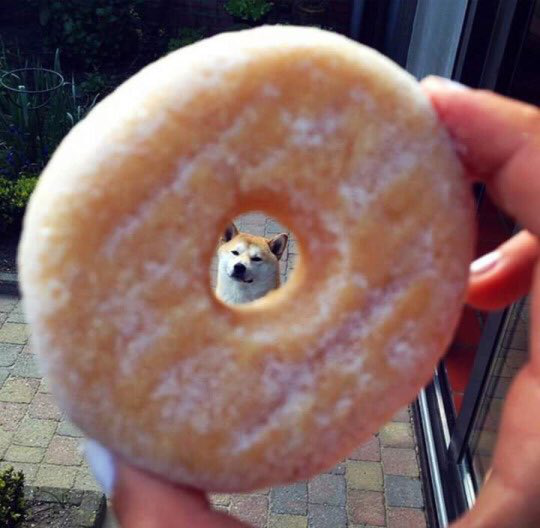

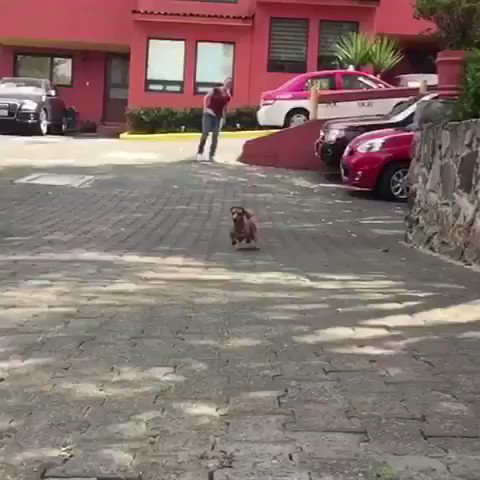

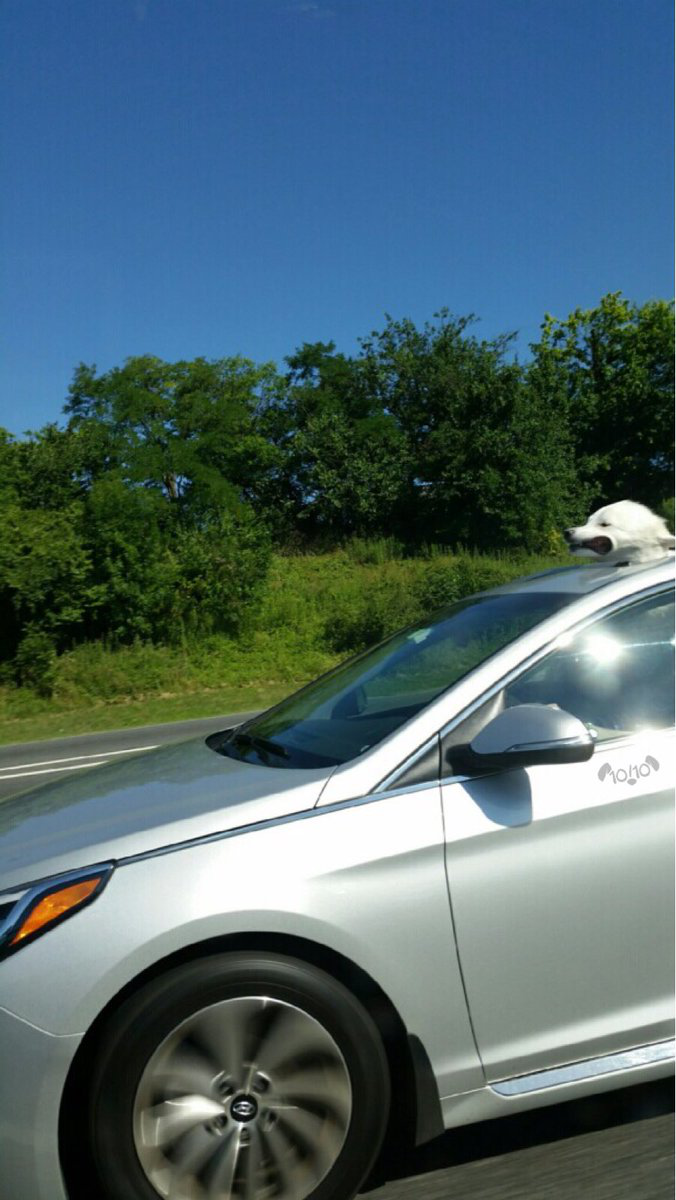

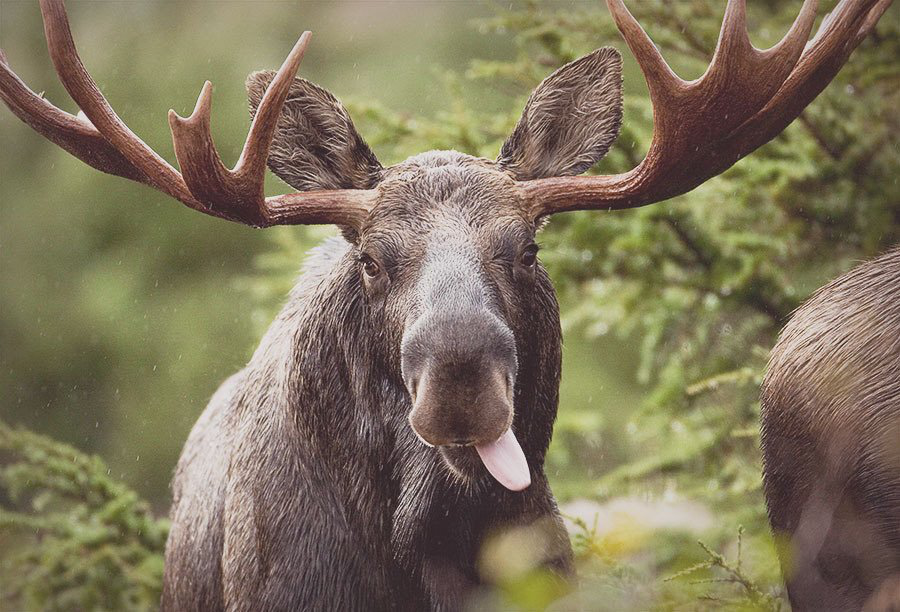

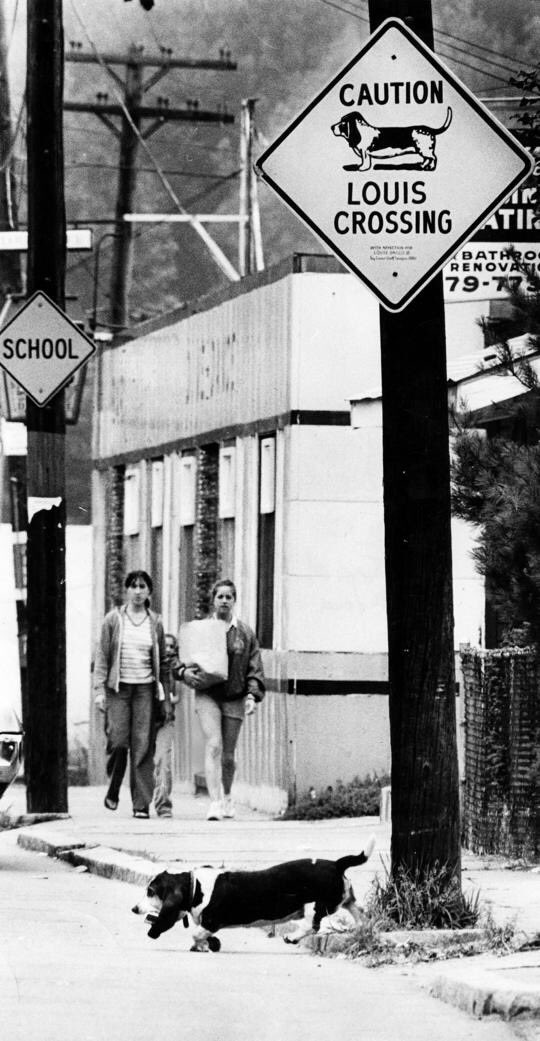

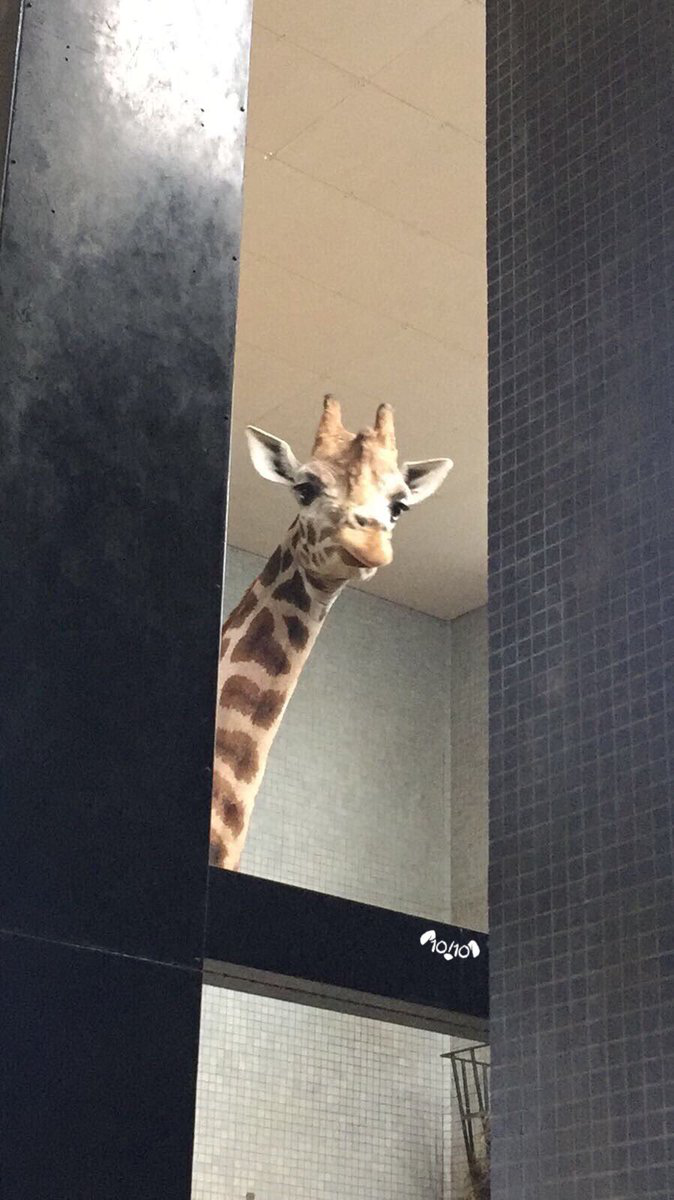

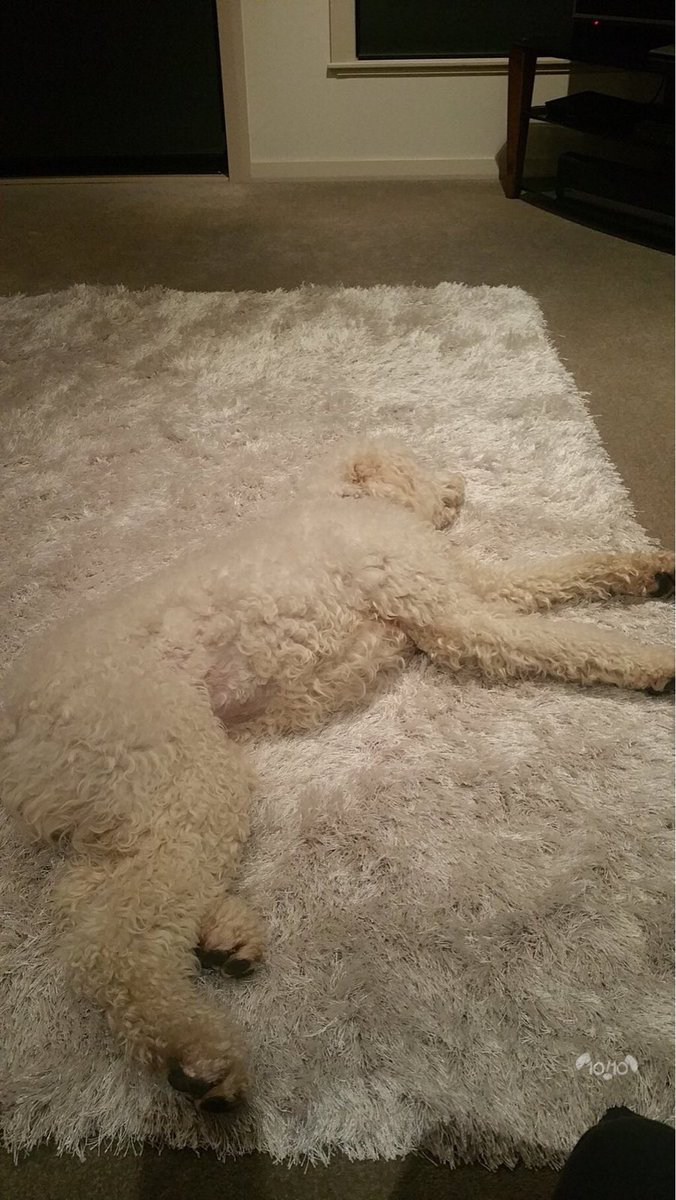

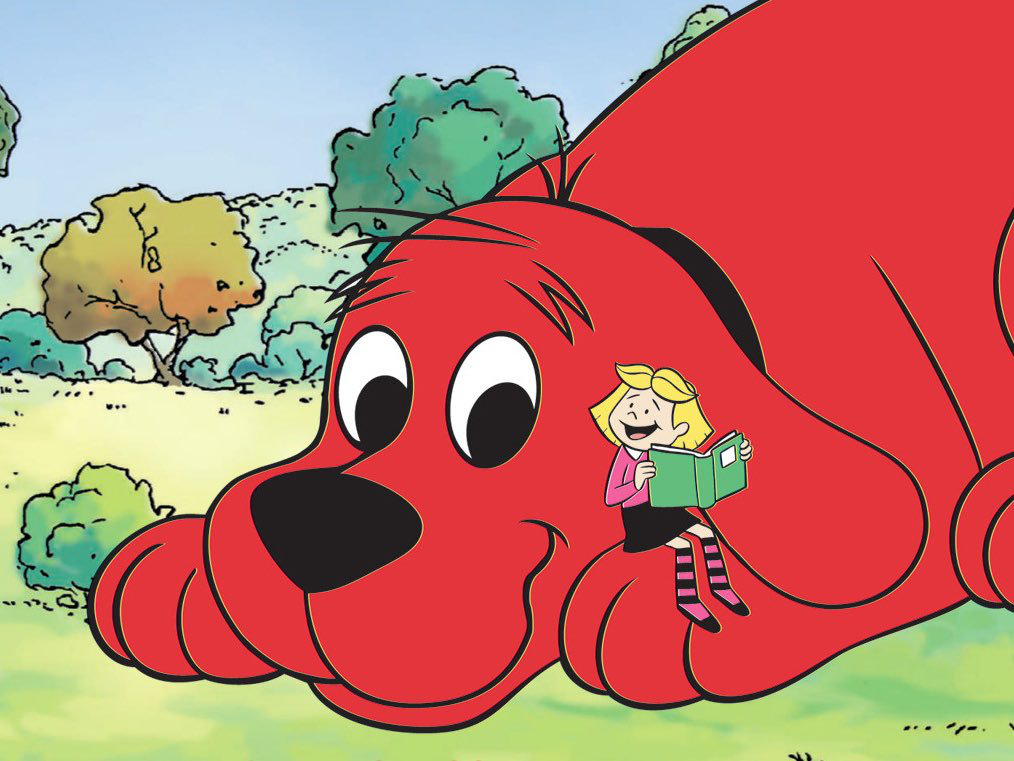

In [116]:
i=[]
for x in range(8):
    url=df_dog_clean.jpg_url[p1&p2&p3].iloc[x]
    r=requests.get(url)
    i.append(Image.open(BytesIO(r.content)))

for img in i:
    display(img)

#### Test

In [117]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2069
Data columns (total 23 columns):
tweet_id           1970 non-null int64
timestamp          1970 non-null object
source             1970 non-null object
text               1970 non-null object
expanded_urls      1970 non-null object
name               1379 non-null object
dog_stage          1970 non-null object
favorite_count     1970 non-null int64
retweet_count      1970 non-null int64
followers_count    1970 non-null int64
jpg_url            1970 non-null object
img_num            1970 non-null int64
p1                 1970 non-null object
p1_conf            1970 non-null float64
p1_dog             1970 non-null bool
p2                 1970 non-null object
p2_conf            1970 non-null float64
p2_dog             1970 non-null bool
p3                 1970 non-null object
p3_conf            1970 non-null float64
p3_dog             1970 non-null bool
rating             1970 non-null float64
num_dogs           1

These samples seem to show a big challenge with NN image classification: the neural network cannot choose what part of the image to "attend" to, and if the dog is not the largest object in the image or blends in, it has issues "focusing" on the dog to make a classification. Not to mention some of the images are humorously not dogs at all.

I don't think this has to be cleaned, but if we want to do an analysis with dog breeds, only highly confident dog images should be used.



## Clean

#### Define

- datatypes: timestamp is object not datetime, tweet_id datatype should be string.


convert timestamp type to datetime, tweet_id to string.

#### Code

In [118]:
df_dog_clean.timestamp=pd.to_datetime(df_dog_clean.timestamp)

In [119]:
df_dog_clean.tweet_id=df_dog_clean.tweet_id.astype('str')

#### Test

In [120]:
df_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2069
Data columns (total 23 columns):
tweet_id           1970 non-null object
timestamp          1970 non-null datetime64[ns]
source             1970 non-null object
text               1970 non-null object
expanded_urls      1970 non-null object
name               1379 non-null object
dog_stage          1970 non-null object
favorite_count     1970 non-null int64
retweet_count      1970 non-null int64
followers_count    1970 non-null int64
jpg_url            1970 non-null object
img_num            1970 non-null int64
p1                 1970 non-null object
p1_conf            1970 non-null float64
p1_dog             1970 non-null bool
p2                 1970 non-null object
p2_conf            1970 non-null float64
p2_dog             1970 non-null bool
p3                 1970 non-null object
p3_conf            1970 non-null float64
p3_dog             1970 non-null bool
rating             1970 non-null float64
num_dogs   

In [121]:
df_dog_clean.sample(10,random_state=190)

tweet_id           timestamp  \
1506  678021115718029313 2015-12-19 01:16:45   
1575  675710890956750848 2015-12-12 16:16:45   
748   756303284449767430 2016-07-22 01:42:09   
534   790337589677002753 2016-10-23 23:42:19   
671   768473857036525572 2016-08-24 15:43:39   
1354  685547936038666240 2016-01-08 19:45:39   
1284  690248561355657216 2016-01-21 19:04:15   
632   773985732834758656 2016-09-08 20:45:53   
2022  666817836334096384 2015-11-18 03:18:55   
1923  668627278264475648 2015-11-23 03:09:00   

                                                 source  \
1506  <a href="http://twitter.com/download/iphone" r...   
1575  <a href="http://twitter.com/download/iphone" r...   
748   <a href="http://twitter.com/download/iphone" r...   
534   <a href="http://twitter.com/download/iphone" r...   
671   <a href="http://twitter.com/download/iphone" r...   
1354  <a href="http://twitter.com/download/iphone" r...   
1284  <a href="http://twitter.com/download/iphone" r...   
632   <a href="http://twitter.com/download/iphone" r...   
2022  <a href="http://twitter.com/download/iphone" r...   
1923  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
1506  This is Reese. He likes holding hands. 12/10 h...   
1575  This is Lenny. He was just told that he couldn...   
748   Pwease accept dis rose on behalf of dog. 11/10...   
534   Meet Maggie. She can hear your cells divide. 1...   
671   Meet Chevy. He had a late breakfast and now ha...   
1354  Everybody needs to read this. Jack is our firs...   
1284  This is Maxwell. That's his moped. He rents it...   
632   Meet Winnie. She just made awkward eye contact...   
2022  This is Jeph. He is a German Boston Shuttlecoc...   
1923  This is Timofy. He's a pilot for Southwest. It...   

                                          expanded_urls     name dog_stage  \
1506  https://twitter.com/dog_rates/status/678021115...    Reese      None   
1575  https://twitter.com/dog_rates/status/675710890...    Lenny      None   
748   https://twitter.com/dog_rates/status/756303284...      NaN      None   
534   https://twitter.com/dog_rates/status/790337589...   Maggie      None   
671   https://twitter.com/dog_rates/status/768473857...    Chevy      None   
1354  https://twitter.com/dog_rates/status/685547936...      NaN    pupper   
1284  https://twitter.com/dog_rates/status/690248561...  Maxwell      None   
632   https://twitter.com/dog_rates/status/773985732...   Winnie    pupper   
2022  https://twitter.com/dog_rates/status/666817836...     Jeph      None   
1923  https://twitter.com/dog_rates/status/668627278...   Timofy      None   

      favorite_count  retweet_count  followers_count    ...      p1_conf  \
1506           14785           7035          5628197    ...     0.822048   
1575            2016            910          5628417    ...     0.441427   
748             4312           1208          5628161    ...     0.981652   
534             8646           2134          5627926    ...     0.658808   
671            14899           3875          5627931    ...     0.739170   
1354           35688          17459          5628193    ...     0.923987   
1284            1816            461          5628185    ...     0.382690   
632            11773           4397          5627931    ...     0.451149   
2022             534            260          5628442    ...     0.496953   
1923             335            122          5628432    ...     0.965403   

      p1_dog                        p2   p2_conf  p2_dog                  p3  \
1506    True                  Doberman  0.096085    True          Rottweiler   
1575    True       miniature_schnauzer  0.248885    True    Sealyham_terrier   
748     True            cocker_spaniel  0.006790    True  Labrador_retriever   
534     True                  Cardigan  0.153096    True         toy_terrier   
671     True  Chesapeake_Bay_retriever  0.246488    True              kelpie   
1354   Fals

## Export

In [122]:
df_dog_clean.to_csv('twitter_archive_master.csv')

## Insights
Here are some insights into the data for the act_report.html.

- Differences in retweets with classified dog breed
- Differences in retweets with dog stage (e.g. puppers)
- Rating vs retweets
- If dog is named vs retweets

Dog breed retweets and favorites

In [123]:
df_dog_clean.p1.value_counts().head(15)

golden_retriever            136
Labrador_retriever           94
Pembroke                     88
Chihuahua                    78
pug                          54
chow                         41
Samoyed                      40
Pomeranian                   38
toy_poodle                   37
malamute                     29
cocker_spaniel               27
French_bulldog               26
Chesapeake_Bay_retriever     23
miniature_pinscher           21
seat_belt                    21
Name: p1, dtype: int64

set some filters for classification confidence, and for the number of dogs in the image.

In [124]:
confidence=df_dog_clean.p1_conf>.6
singledog=df_dog_clean.num_dogs==1

In [125]:
df_dog_clean[(df_dog_clean.p1=='Pomeranian')
             &confidence&singledog][['favorite_count','retweet_count']].mean()

favorite_count    6080.44
retweet_count     2342.80
dtype: float64

In [126]:
df_dog_clean[(df_dog_clean.p1=='pug')
             &confidence&singledog][['favorite_count','retweet_count']].mean()

favorite_count    4983.578947
retweet_count     1612.421053
dtype: float64

In [127]:
df_dog_clean[(df_dog_clean.p1=='Labrador_retriever')
             &confidence&singledog][['favorite_count','retweet_count']].mean()

favorite_count    15267.648148
retweet_count      5167.407407
dtype: float64

In [128]:
df_dog_clean[(df_dog_clean.p1=='golden_retriever')
             &confidence&singledog][['favorite_count','retweet_count']].mean()

favorite_count    12949.528846
retweet_count      3735.682692
dtype: float64

In [129]:

breed_contrast=df_dog_clean[(df_dog_clean.p1.isin(['golden_retriever',
                                                   'Labrador_retriever',
                                                   'Pomeranian','pug']))&confidence&singledog]
breed_contrast.head()

tweet_id           timestamp  \
14  889531135344209921 2017-07-24 17:02:04   
16  888917238123831296 2017-07-23 00:22:39   
29  886258384151887873 2017-07-15 16:17:19   
40  883482846933004288 2017-07-08 00:28:19   
42  883117836046086144 2017-07-07 00:17:54   

                                               source  \
14  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
29  <a href="http://twitter.com/download/iphone" r...   
40  <a href="http://twitter.com/download/iphone" r...   
42  <a href="http://twitter.com/download/iphone" r...   

                                                 text  \
14  This is Stuart. He's sporting his favorite fan...   
16  This is Jim. He found a fren. Taught him how t...   
29  This is Waffles. His doggles are pupside down....   
40  This is Bella. She hopes her smile made you sm...   
42  Please only send dogs. We don't rate mechanics...   

                                        expanded_urls     name dog_stage  \
14  https://twitter.com/dog_rates/status/889531135...   Stuart     puppo   
16  https://twitter.com/dog_rates/status/888917238...      Jim      None   
29  https://twitter.com/dog_rates/status/886258384...  Waffles      None   
40  https://twitter.com/dog_rates/status/883482846...    Bella      None   
42  https://twitter.com/dog_rates/status/883117836...      NaN      None   

    favorite_count  retweet_count  followers_count    ...      p1_conf  \
14           15225           2272          5627901    ...     0.953442   
16           29323           4591          5627901    ...     0.714719   
29           28212           6409          5627901    ...     0.943575   
40           46365          10189          5627902    ...     0.943082   
42           37542           6804          5627902    ...     0.949562   

    p1_dog                  p2   p2_conf  p2_dog                  p3  \
14    True  Labrador_retriever  0.013834    True             redbone   
16    True     Tibetan_mastiff  0.120184    True  Labrador_retriever   
29    True          shower_cap  0.025286   False         Siamese_cat   
40    True  Labrador_retriever  0.032409    True              kuvasz   
42    True  Labrador_retriever  0.045948    True              kuvasz   

     p3_conf  p3_dog rating  num_dogs  
14  0.007958    True   1.30       1.0  
16  0.105506    True   1.20       1.0  
29  0.002849   False   1.30       1.0  
40  0.005501    True   1.35       1.0  
42  0.002471    True   1.30       1.0  

[5 rows x 23 columns]

In [130]:
breed_contrast=breed_contrast.replace({'p1':{'golden_retriever': 'Golden Retriever','Labrador_retriever':'Labrador','pug':'Pug'}})



In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

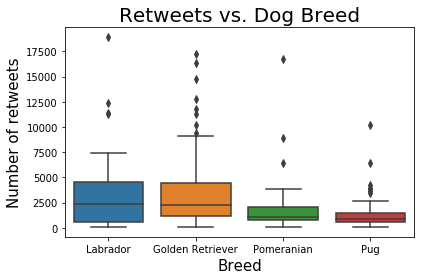

In [132]:
g=sns.boxplot(data=breed_contrast[breed_contrast.retweet_count<breed_contrast.retweet_count.quantile(.99)],
                                  y='retweet_count',x='p1',
              order=['Labrador','Golden Retriever','Pomeranian','Pug'])
# g.set_yscale('log')
plt.ylabel('Number of retweets',fontsize=15)
plt.xlabel('Breed',fontsize=15)
plt.title('Retweets vs. Dog Breed',fontsize=20)
plt.plot()
plt.tight_layout()
plt.savefig('retweetvsdog.png')
plt.show()

In [133]:
df_dog_clean.groupby('dog_stage')[['favorite_count','retweet_count']].median()

favorite_count  retweet_count
dog_stage                               
None               3871.0         1293.0
doggo             12224.0         3256.0
floofer           11145.0         3192.0
multiple           9898.0         2774.0
pupper             3228.0         1208.0
puppo             13254.0         3070.5

In [134]:
df_dog_clean.groupby('dog_stage').tweet_id.count()

dog_stage
None        1667
doggo         63
floofer        7
multiple      10
pupper       201
puppo         22
Name: tweet_id, dtype: int64

In [135]:
df_dog_clean.groupby(df_dog_clean.name.notnull())[['favorite_count','retweet_count']].median()

favorite_count  retweet_count
name                                
False            3187           1114
True             4651           1490

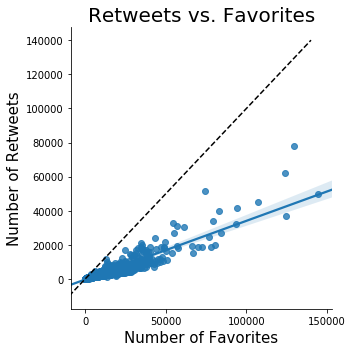

In [136]:
g=sns.lmplot(data=df_dog_clean,x='favorite_count',y='retweet_count')
    
g.set(xticks=range(0,150001,50000))
plt.plot([-10000,140000],[-10000,140000],'k--')
plt.ylabel('Number of Retweets',fontsize=15)
plt.xlabel('Number of Favorites',fontsize=15)
plt.title("Retweets vs. Favorites",fontsize=20)
plt.tight_layout()
plt.savefig('retweetvsfavorites.png')
plt.show()

In [137]:
import numpy as np
np.corrcoef(df_dog_clean.retweet_count,df_dog_clean.favorite_count)[0,1]

0.9170878090887628

In [138]:
df_dog_clean[df_dog_clean.rating<df_dog_clean.rating.quantile(.99)].rating.median()

1.1

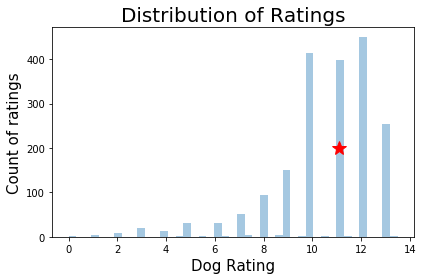

In [139]:
g=sns.distplot(df_dog_clean[df_dog_clean.rating<df_dog_clean.rating.quantile(.99)].rating*10,
              kde=False)
    
plt.plot(11.1,200,'r*',ms=15)
plt.ylabel('Count of ratings',fontsize=15)
plt.xlabel('Dog Rating',fontsize=15)
plt.title("Distribution of Ratings",fontsize=20)

plt.tight_layout()
plt.savefig('distofrating.png')
plt.show()

# Template

## Clean

#### Define



#### Code

#### Test